In [9]:
from scipy.integrate import solve_ivp
from scipy.optimize import root

import numpy as np



def deriv(x, y):
    dz, u = y
    d_dz = -10 * u
    d_u = dz + u
    return np.array([d_dz, d_u], dtype=float)


def ivp(u_start):
    y0 = np.array([2, u_start])
    
    x_range = [0, 1]
    
    sol = solve_ivp(deriv, x_range, y0)
    return sol



def mismatch(s):
    sol = ivp(s[0])
    
    return sol.y[0, -1] + sol.y[1, -1] # error

s_guess = 0.1
res = root(mismatch, s_guess)

print(res)


 message: The solution converged.
 success: True
  status: 1
     fun: -1.3322676295501878e-15
       x: [-1.887e+00]
  method: hybr
    nfev: 12
    fjac: [[-1.000e+00]]
       r: [ 1.866e+00]
     qtf: [ 1.332e-15]


TypeError: 'NoneType' object is not callable

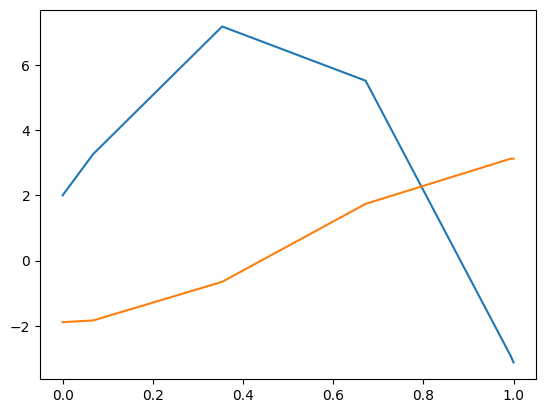

In [ ]:
sol = ivp(res.x[0])

import matplotlib.pyplot as plt

t = np.linspace(0, 1, 100)

plt.plot(sol.t, sol.y.T)
plt.plot(t, sol.sol(t))
plt.show()


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  6.753e-02  3.538e-01  6.719e-01  9.933e-01
             1.000e+00]
        y: [[ 2.000e+00  3.262e+00  7.175e+00  5.513e+00 -2.915e+00
             -3.123e+00]
            [-1.887e+00 -1.835e+00 -6.511e-01  1.738e+00  3.122e+00
              3.123e+00]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x00000191C8AF0690>
 t_events: None
 y_events: None
     nfev: 32
     njev: 0
      nlu: 0


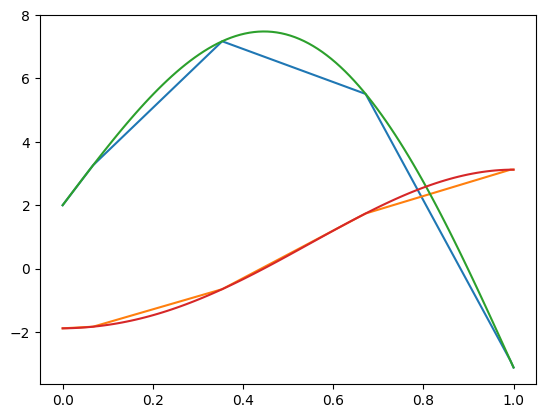

In [24]:




y0 = np.array([2, res.x[0]])

x_range = [0, 1]

sol = solve_ivp(deriv, x_range, y0, dense_output=True)
print(sol)


import matplotlib.pyplot as plt

t = np.linspace(0, 1, 100)

plt.plot(sol.t, sol.y.T)
plt.plot(t, sol.sol(t).T)
plt.show()